In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

import config
import parameter_estimation

In [26]:
df = np.load(config.data_path + "/parameter.npz")
samples = df["samples"]

In [27]:
if "parameter" in df:
    parameter = df["parameter"]
else:
    #                          mean value, lower error, upper error
    parameter = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

In [28]:
print("PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR")
for name, ip, ie, p in zip(parameter_estimation.parameter_names, parameter_estimation.inital_guess, 
                           parameter_estimation.errors, parameter):
    print(name + " " * (len("Lambda_QCD") - len(name)), 
          "%e" % ip, "+/-", "%e" % ie, "vs", "%e" % p[0], "+", "%e" % p[1], "-", "%e" % p[2])

PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR
theta_i    1.000000e+00 +/- 0.000000e+00 vs 1.000047e+00 + 1.182513e-02 - 9.163560e-03
log_f_a    2.100000e+01 +/- 0.000000e+00 vs 2.097300e+01 + 6.168139e-03 - 8.248206e-03
M_pl       2.435403e+27 +/- 2.792596e+22 vs 2.435399e+27 + 4.126667e+22 - 4.485956e+22
Lambda_QCD 2.000000e+08 +/- 2.000000e+07 vs 1.999784e+08 + 4.501572e+06 - 3.350368e+06
m_u        2.300000e+06 +/- 3.750000e+05 vs 2.299671e+06 + 5.813282e+04 - 3.134434e+04
m_d        4.800000e+06 +/- 3.250000e+05 vs 4.800545e+06 + 9.072892e+04 - 8.332833e+04
m_pi       1.349770e+08 +/- 5.000000e+02 vs 1.349769e+08 + 7.814582e+02 - 8.417125e+02
f_pi       9.192388e+07 +/- 5.000000e+06 vs 9.197151e+07 + 1.653081e+06 - 1.846428e+06
T0         2.348653e-04 +/- 5.170398e-09 vs 2.348661e-04 + 8.568592e-09 - 7.444952e-09
rho_c      3.667106e-11 +/- 9.808371e-14 vs 3.667762e-11 + 8.976618e-14 - 1.020090e-13


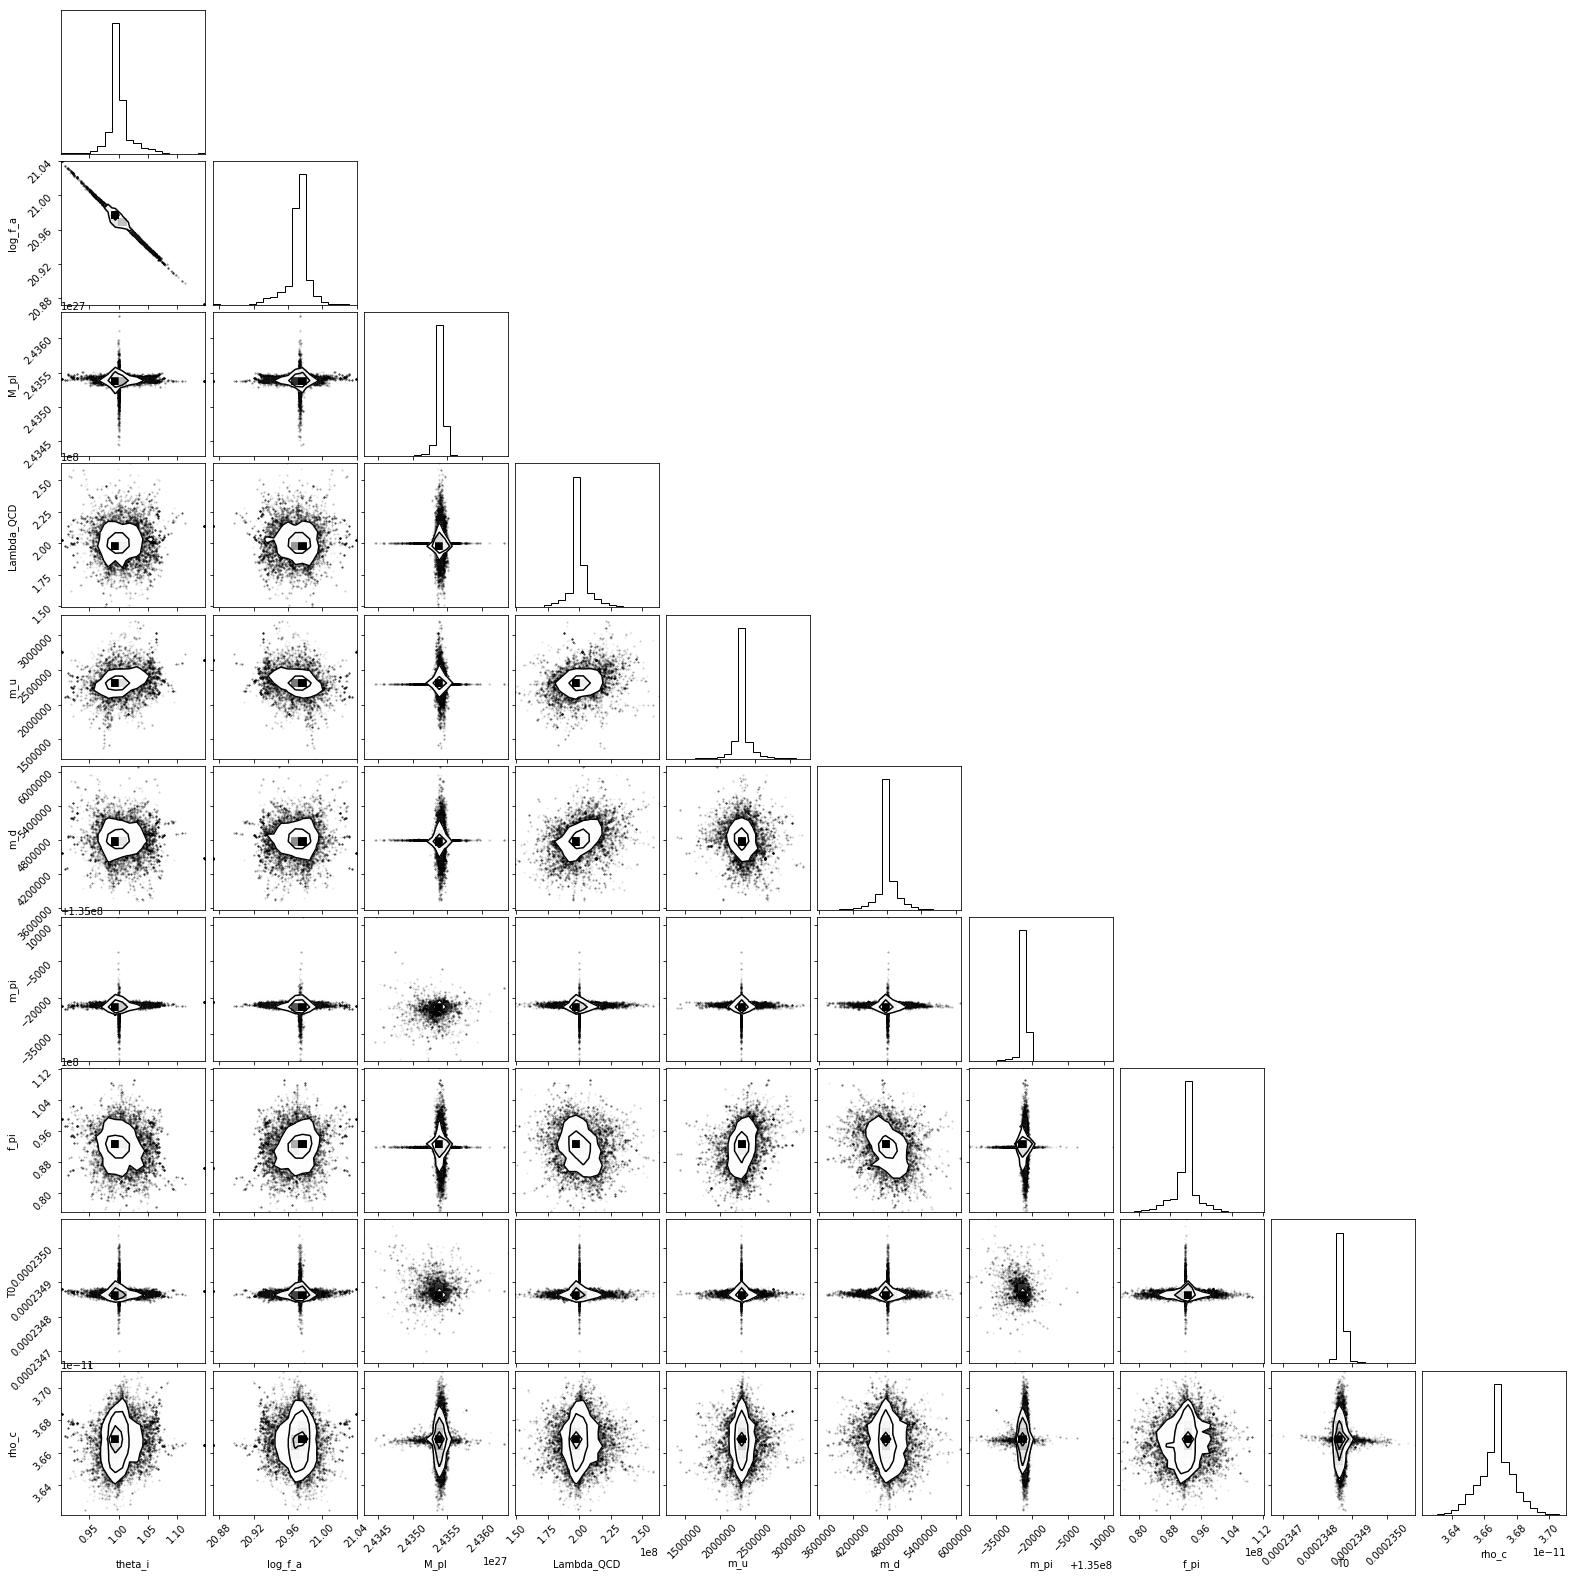

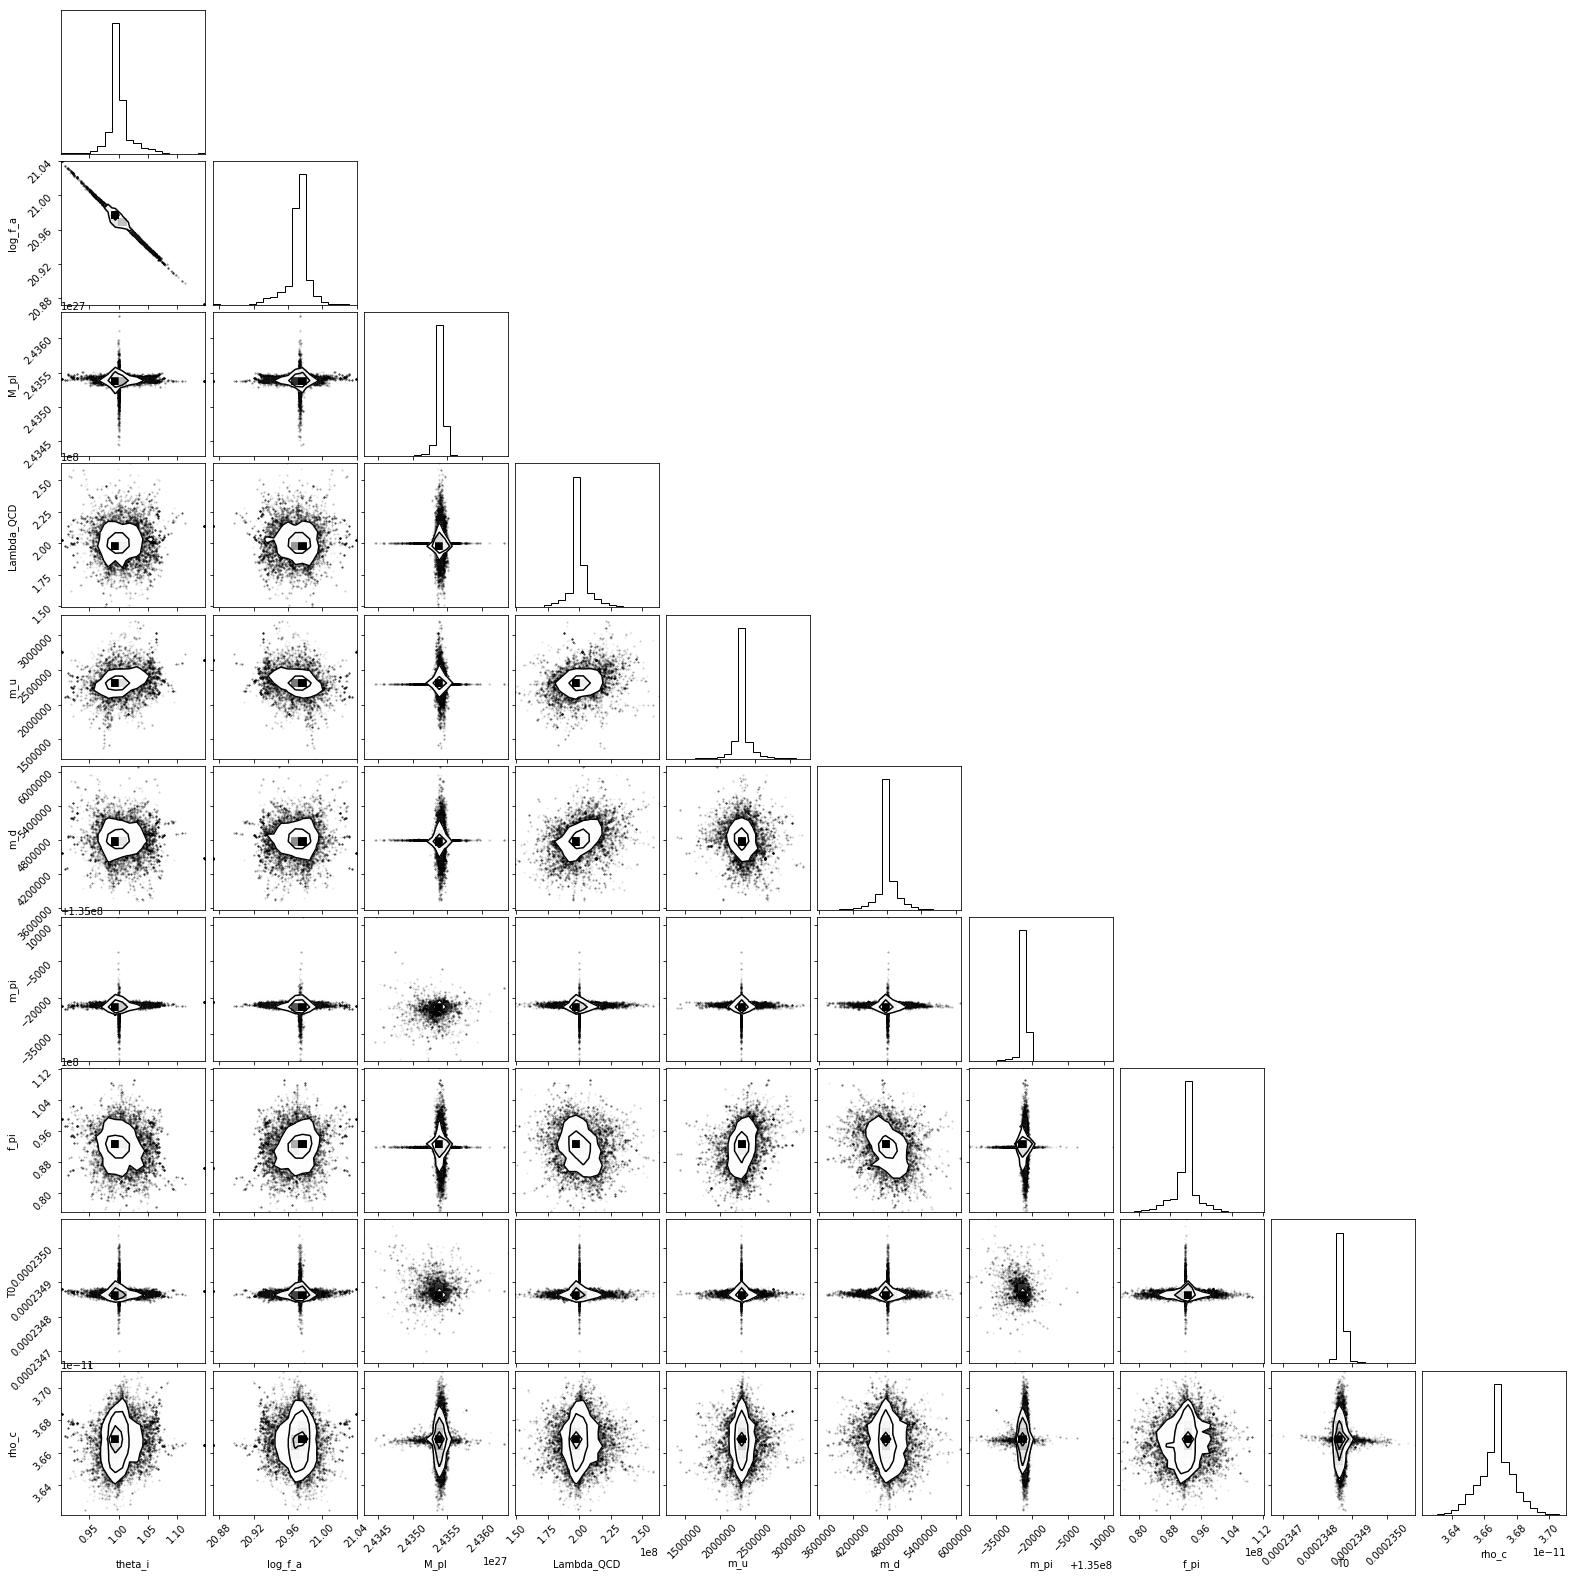

In [7]:
corner.corner(samples, labels=parameter_estimation.parameter_names)

In [10]:
plt.hist?

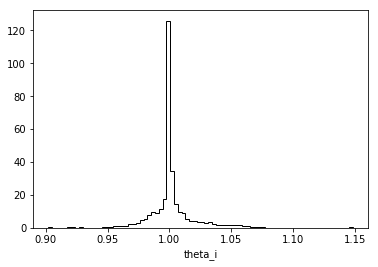

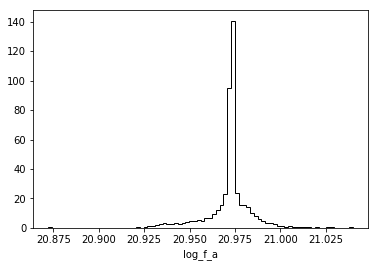

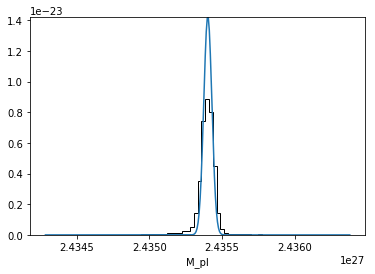

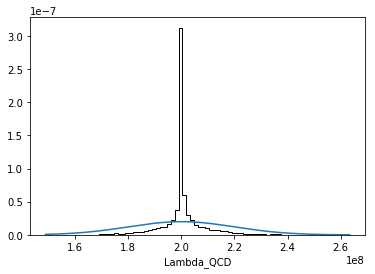

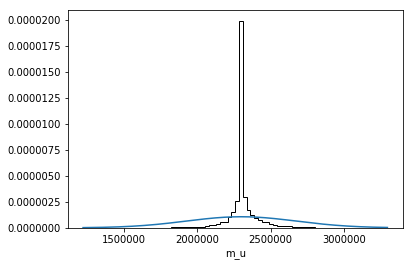

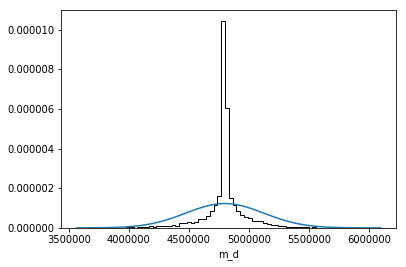

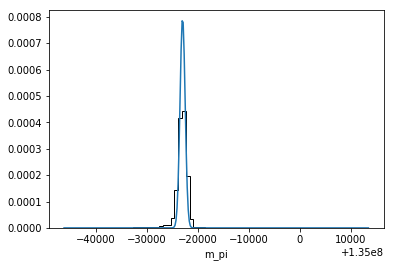

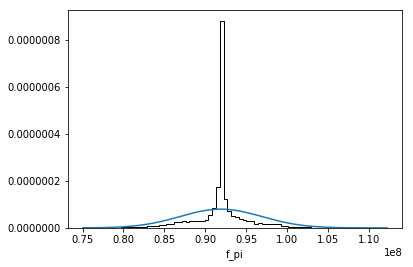

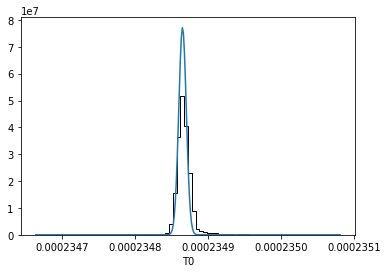

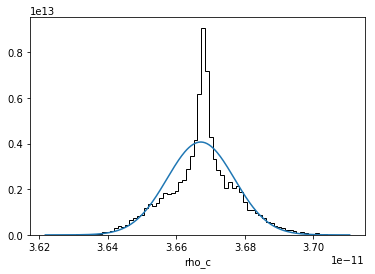

In [23]:
for i, (name, x0, x_err) in enumerate(zip(parameter_estimation.parameter_names,
                                          parameter_estimation.inital_guess,
                                          parameter_estimation.errors)):
    ps = samples[:, i]
    if i > 1:
        vals = np.linspace(np.min(ps), np.max(ps), 300)
        plt.plot(vals, np.exp(- (vals - x0)**2 / (2 * x_err**2)) / np.sqrt(2 * np.pi * x_err**2))
    plt.hist(ps, histtype="step", bins=80, density=True, color="black")
    plt.xlabel(name)
    plt.show()

In [19]:
plt.hist?